In [38]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math 

In [39]:
def get_result_from_backend(qc, shots=1000, simulator_name='qasm_simulator'):
    
    # Choose the backend (simulator or real quantum device)
    backend = Aer.get_backend(simulator_name)

    # Transpile the quantum circuit for the chosen backend
    transpiled_qc = transpile(qc, backend)

    # Execute the quantum circuit on the chosen backend
    result = execute(transpiled_qc, backend, shots=shots).result()
    
    return result

In [40]:
def get_unitary_matrix(qc):
    result = get_result_from_backend(qc,simulator_name='unitary_simulator')
    return result.get_unitary(qc, decimals=3)

In [41]:
def get_state_vector(qc):
    result = get_result_from_backend(qc,simulator_name='statevector_simulator')
    statevector = result.get_statevector()

    # Visualize the Bloch sphere representation of the final state
    return statevector

# A Simple Demonstration

The notions are very much similar to that of CNOT gate. The difference is that, CCNOT gate has two control qubits and one single target qubit. Moreover, it only flips the state of the target qubit when both of its control qubits are at |1> state.

So, if a and b are the control qubits and c is the target qubit, then the classical equivalent of Toffloi CCNOT gate is 

c = c XOR (a AND b)

Let's experiment.

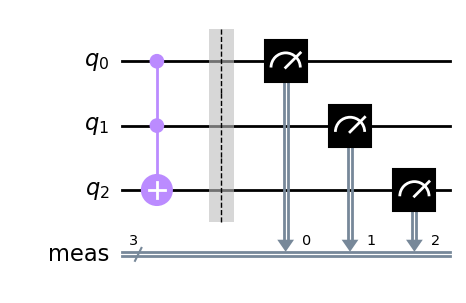

In [42]:
# A quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply Toffoli (CCNOT) gate
qc.ccx(0, 1, 2)

qc.measure_all()

qc.draw('mpl')

The basic setup is like above, where q0 and q1 are the control qubits and q2 is the target. Let's change q0 and q1 both to state |1> and see whether q2 then flips.

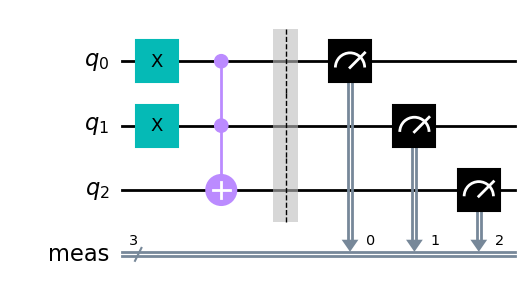

In [43]:
# A quantum circuit with 3 qubits
qc = QuantumCircuit(3)

qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)

qc.measure_all()

qc.draw('mpl')

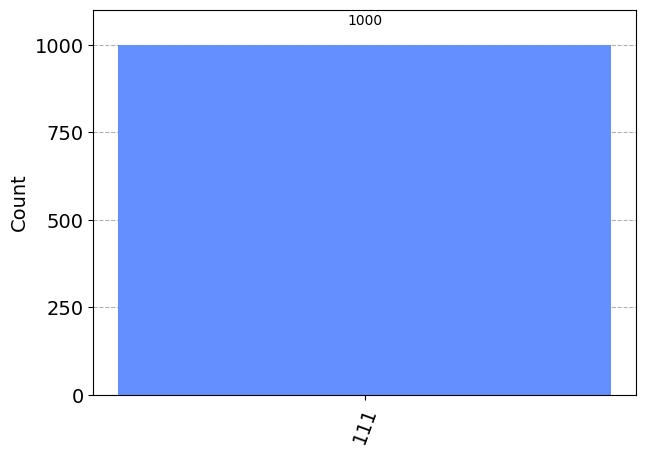

In [44]:
result = get_result_from_backend(qc)

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

Yes, just as expected, we end up measuring a all of the qubits at state |1>

What if we previously added a Pauli-X gate to q2 also. Then it should flip back to |0>, after applying Toffli CCNOT gate.

And since in qiskit, the lowermost bit referes to MSB, we should end up measuring the superposition |011>. Let's see whether it happens.

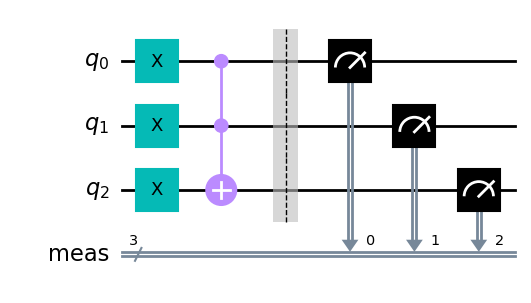

In [45]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(1)
qc.x(2)
qc.ccx(0, 1, 2)

qc.measure_all()

qc.draw('mpl')

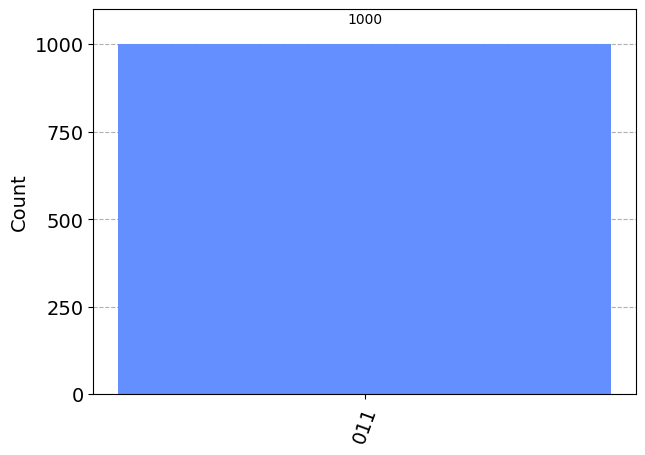

In [46]:
result = get_result_from_backend(qc)

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

However, is we remove any of the Pauli-X gates from qubits 0 and 1, the CCNOT would no longer flip the qubit q2.

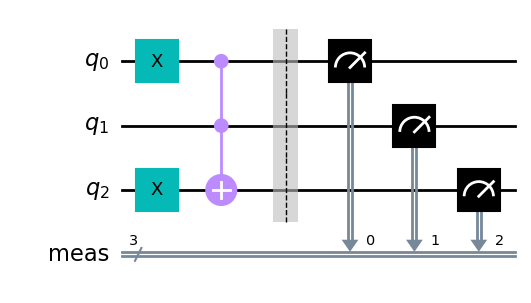

In [47]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)
qc.ccx(0, 1, 2)

qc.measure_all()

qc.draw('mpl')

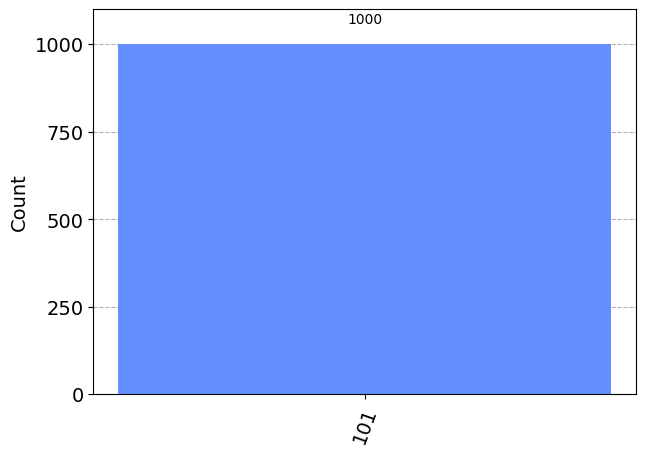

In [48]:
result = get_result_from_backend(qc)

# Get the counts of the measurements
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

As expected, no qubit changes state.

# Matching the Matrix Again

Let's just find the unitary matrix for the first circuit showing a simple demonstration of Toffoli CCNOT gate (which will obviously be an 8x8 matrix in this case, as we are operating on 3 qubits).

In [49]:
qc = QuantumCircuit(3)

qc.ccx(0, 1, 2)

print(get_unitary_matrix(qc))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# Let's Look at 3 Bloch Spheres Now

Now let's observe how the qubits look like in Bloch Sphere before and after applying the Toffoli CCNOT gate.

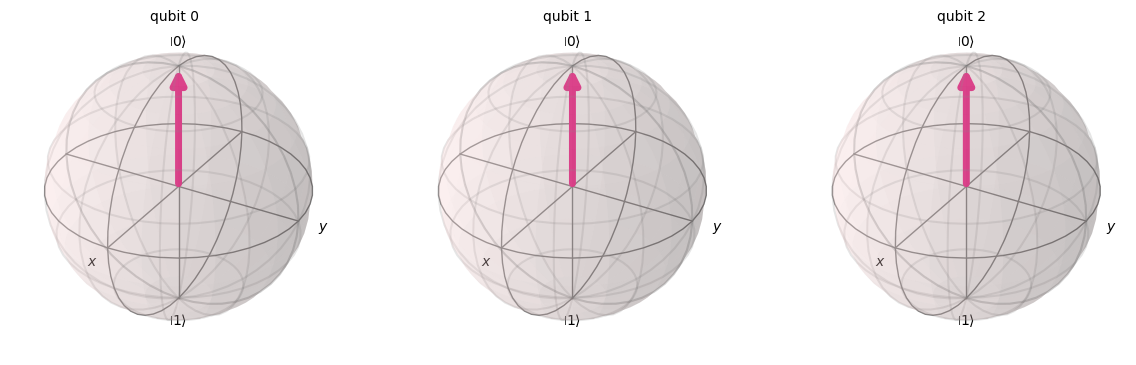

In [50]:
qc = QuantumCircuit(3)

plot_bloch_multivector(get_state_vector(qc))

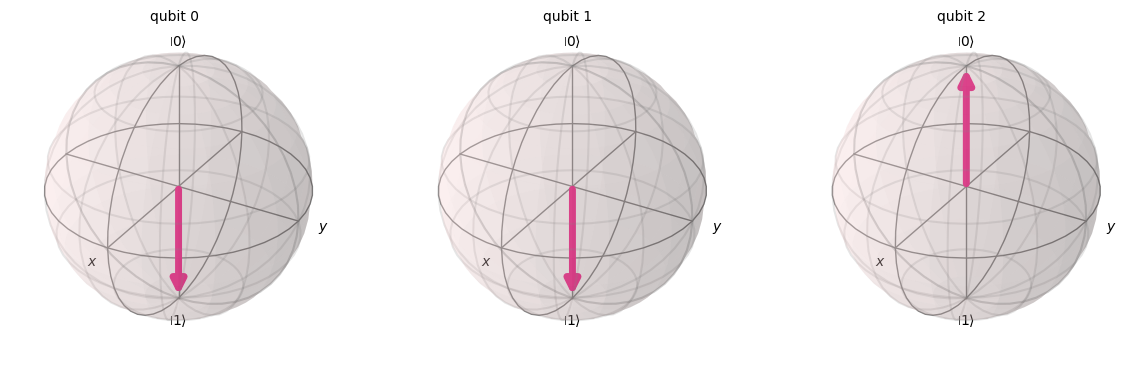

In [51]:
qc.x(0)
qc.x(1)

plot_bloch_multivector(get_state_vector(qc))

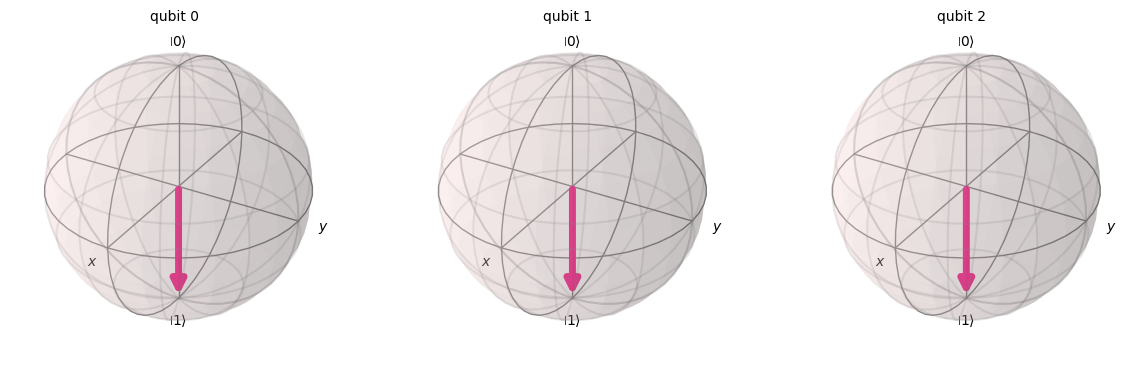

In [52]:
qc.ccx(0,1,2)

plot_bloch_multivector(get_state_vector(qc))

Yes it works just as expected theoretically.

# Not Only Classical

But remember that, quantum gates will just as well generalize to any statevector or any superposition.

And in this case, Flipping actually refers to rotating the qubit by 180 degrees, with respect to X-axis.

Now, say we experiment tha same thing as above, but this time, we first rotate out target qubit slightly. Then we take qubits q0 and q1 to state |1>. Then let's see whether CCNOT gate really rotates the qubit q2 by 180 degrees around x-axis.

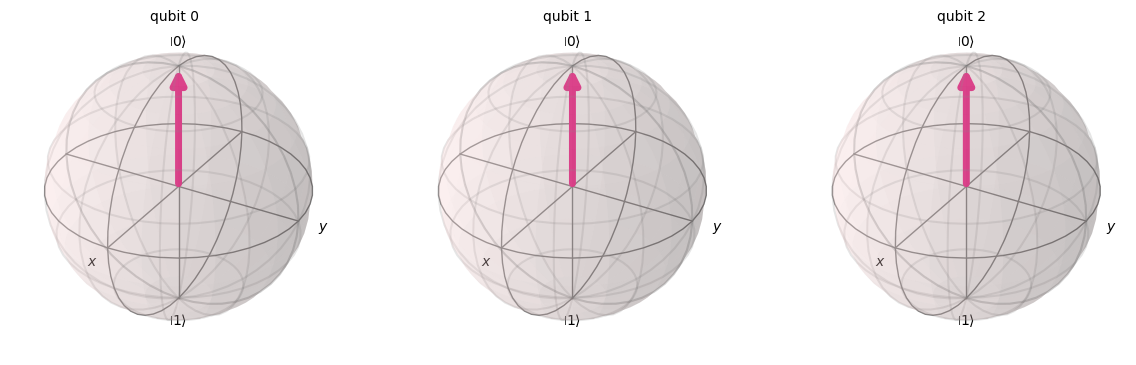

In [53]:
qc = QuantumCircuit(3)

plot_bloch_multivector(get_state_vector(qc))

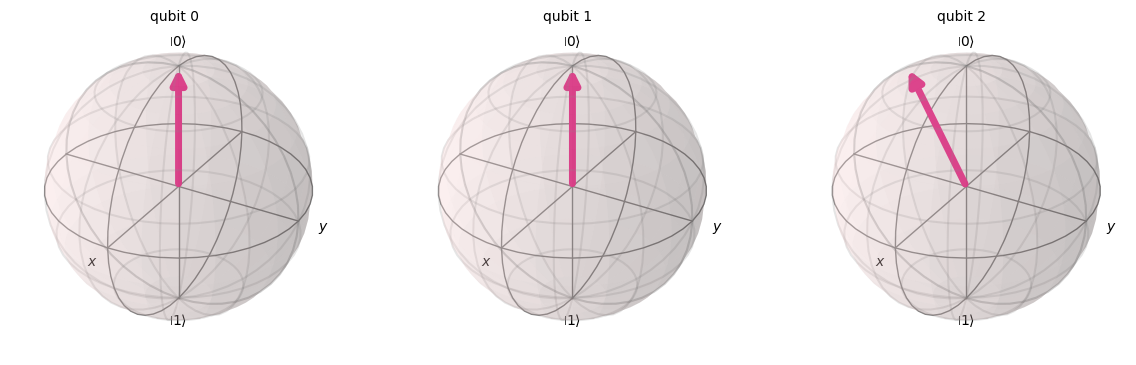

In [54]:
qc = QuantumCircuit(3)

# It may look unfamiliar. Just like P gate, Rx, Ry, Rz gates rotates the qubits around x, y and z gates respectively
qc.rx(math.pi/6,2)

plot_bloch_multivector(get_state_vector(qc))

# After this, the statevector of q2 will rotate by 30 degrees around x axis, as you can see.

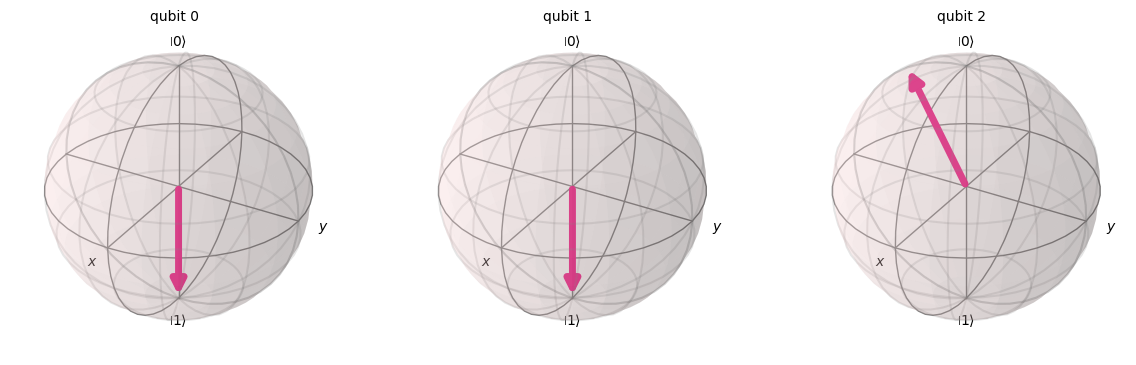

In [55]:
qc.x(0)
qc.x(1)

plot_bloch_multivector(get_state_vector(qc))

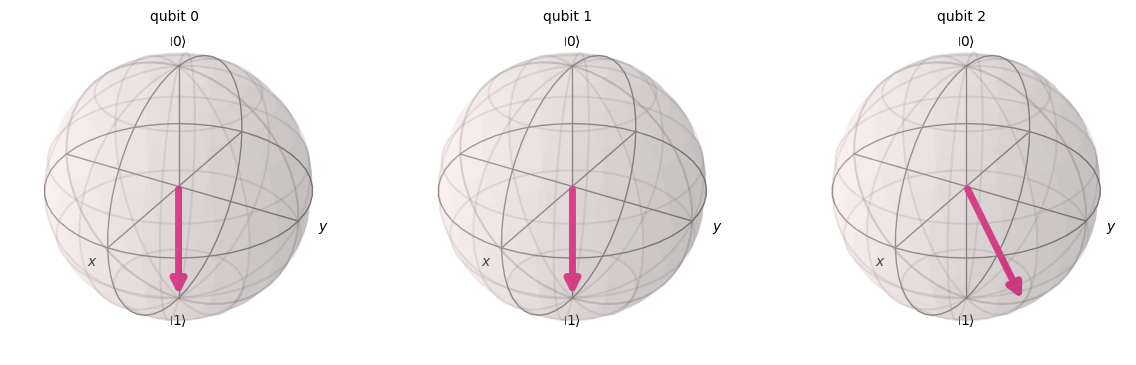

In [56]:
# Now we again apply Toffoli CCNOT gate

qc.ccx(0,1,2)

plot_bloch_multivector(get_state_vector(qc))

Precisely, q2 now rotates another 180 degrees around x axis.

# When to apply?

We may consider applying Toffoli CCNOT gate whenever we need the AND of two quantities. Say, for a one-bit binary adder, the carry-out happens to be the AND of the two operands. 

We may think it like this, the carry-out qubit(initially at |0>) should only flip if noth the operand qubits are at |1>.

Thus a Toffoli CCNOT gate perfectly suits.

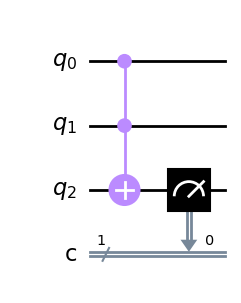

In [57]:
qc = QuantumCircuit(3,1)

qc.ccx(0,1,2)

qc.measure(2,0)

qc.draw('mpl')

# Universality

Another astonishing property of Toffoli CCNOT gate is that it is universal. Much like the classical gates NAND nad NOR, Toffoli CCNOT is capable of implementing any function over m qubits.